# Can you show snow depth over time? Annually? (Remember, seasons are more important than calendar years. 2020/2021 is more important than just 2021. So maybe choose July 1 as your start of year, or something.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weather = pd.read_pickle('../data-prep/pkl/all_wx.pkl')

In [2]:
pd.set_option('display.max_columns', None)
weather

,dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
0,2022-12-23 04:00:00,-25.0,-31.0,72.0,NaN,NaN,ESE,1G4,0.0,12.6,0.1,0.1,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
1,2022-12-23 03:00:00,-26.0,-32.0,72.0,NaN,NaN,ESE,1G3,0.0,12.6,0.1,0.1,0.4,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
2,2022-12-23 02:00:00,-27.0,-33.0,71.0,NaN,NaN,ESE,1G4,0.0,12.5,0.1,0.0,0.3,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
3,2022-12-23 01:00:00,-28.0,-34.0,72.0,NaN,NaN,ESE,2G5,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
4,2022-12-23 00:00:00,-29.0,-35.0,71.0,NaN,NaN,ESE,2G4,0.0,12.5,0.0,0.0,0.2,JVEMT,JVEMT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203968,2022-01-01 04:00:00,-4.0,NaN,NaN,NaN,-26.0,S,18G31,NaN,40.8,0.1,0.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.60,29.82,NaN,NaN
203969,2022-01-01 03:00:00,-5.0,NaN,NaN,NaN,-26.0,S,15G21,NaN,41.5,0.5,0.3,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203970,2022-01-01 02:00:00,-3.0,NaN,NaN,NaN,-23.0,SSW,15G25,NaN,40.9,0.0,0.4,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.59,29.81,NaN,NaN
203971,2022-01-01 01:00:00,-4.0,NaN,NaN,NaN,-22.0,SW,12G19,NaN,40.7,0.0,1.0,NaN,MRPMT,MRPMT-2022.html,2022,NaN,24.57,29.79,NaN,NaN


In [3]:
narrow = weather.loc[:,('dt','snow_depth')]
narrow

,dt,snow_depth
0,2022-12-23 04:00:00,12.6
1,2022-12-23 03:00:00,12.6
2,2022-12-23 02:00:00,12.5
3,2022-12-23 01:00:00,12.5
4,2022-12-23 00:00:00,12.5
...,...,...
203968,2022-01-01 04:00:00,40.8
203969,2022-01-01 03:00:00,41.5
203970,2022-01-01 02:00:00,40.9
203971,2022-01-01 01:00:00,40.7


In [4]:
narrow['month'] = pd.DatetimeIndex(narrow['dt']).month
narrow

,dt,snow_depth,month
0,2022-12-23 04:00:00,12.6,12
1,2022-12-23 03:00:00,12.6,12
2,2022-12-23 02:00:00,12.5,12
3,2022-12-23 01:00:00,12.5,12
4,2022-12-23 00:00:00,12.5,12
...,...,...,...
203968,2022-01-01 04:00:00,40.8,1
203969,2022-01-01 03:00:00,41.5,1
203970,2022-01-01 02:00:00,40.9,1
203971,2022-01-01 01:00:00,40.7,1


In [5]:
narrow['year'] = pd.DatetimeIndex(narrow['dt']).year
narrow

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


In [6]:
year2022 = narrow.loc[narrow.year == 2022]
year2022

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022


<AxesSubplot:xlabel='snow_depth', ylabel='Density'>

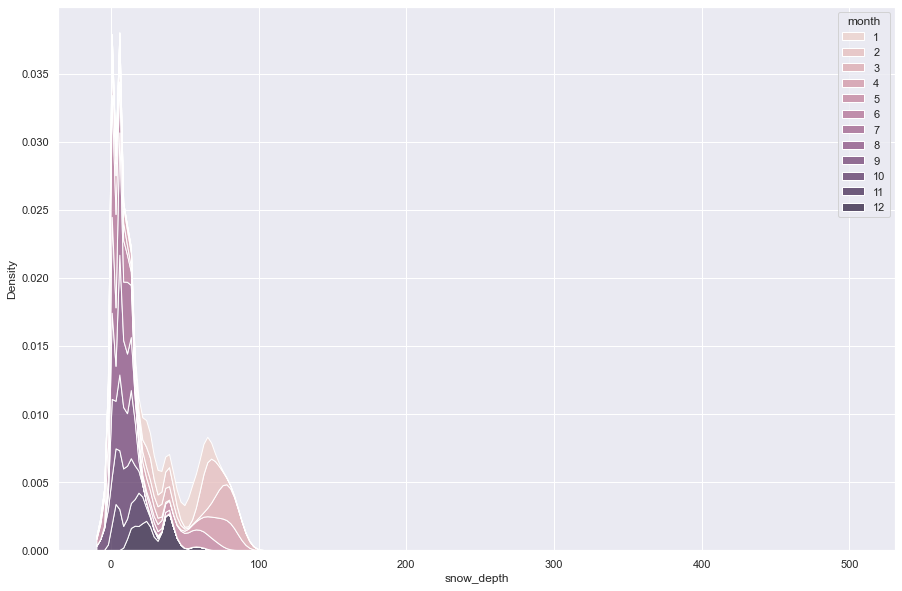

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.kdeplot(data=year2022, x="snow_depth", hue="month", multiple="stack")



In [8]:
narrow

,dt,snow_depth,month,year
0,2022-12-23 04:00:00,12.6,12,2022
1,2022-12-23 03:00:00,12.6,12,2022
2,2022-12-23 02:00:00,12.5,12,2022
3,2022-12-23 01:00:00,12.5,12,2022
4,2022-12-23 00:00:00,12.5,12,2022
...,...,...,...,...
203968,2022-01-01 04:00:00,40.8,1,2022
203969,2022-01-01 03:00:00,41.5,1,2022
203970,2022-01-01 02:00:00,40.9,1,2022
203971,2022-01-01 01:00:00,40.7,1,2022
